## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
FinalProject = pd.read_csv('/content/drive/MyDrive/UCAMP 7 Final/googleplaystore_user_reviews.csv')

In [4]:
FinalProject.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
print(FinalProject.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [6]:
# Se obtiene un resumen de los datos #
print(FinalProject.describe())

       Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000


In [7]:
# Verificamos valores nulos en cada columna #

In [8]:
print(FinalProject.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [9]:
# Para simplificar el analisis eliminamos las filas donde Translated_Review esté vacío ya que no aporta nada útil al modelo #
FinalProject_cleaned = FinalProject.dropna(subset=['Translated_Review'])

In [10]:
# Comprobar que se eliminaron las filas #
print(FinalProject_cleaned.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [11]:
# Llenar valores nulos en 'Sentiment_Polarity' y 'Sentiment_Subjectivity' con la mediana
FinalProject_cleaned['Sentiment_Polarity'].fillna(FinalProject_cleaned['Sentiment_Polarity'].median(), inplace=True)
FinalProject_cleaned['Sentiment_Subjectivity'].fillna(FinalProject_cleaned['Sentiment_Subjectivity'].median(), inplace=True)

# Verificar nuevamente si hay valores nulos
print(FinalProject_cleaned.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


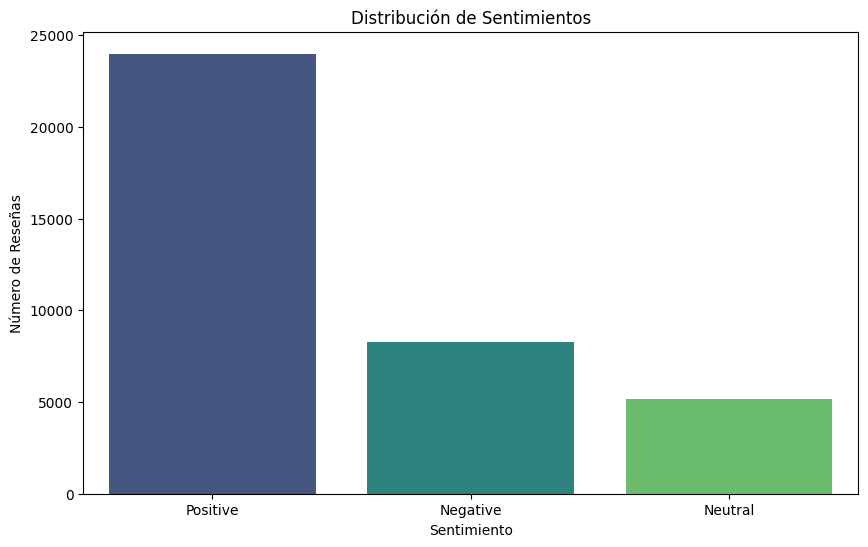

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de instancias de cada sentimiento
sentiment_counts = FinalProject_cleaned['Sentiment'].value_counts()

# Graficar la distribución de los sentimientos
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Reseñas')
plt.show()

# Agregué color en ésta gráfica #

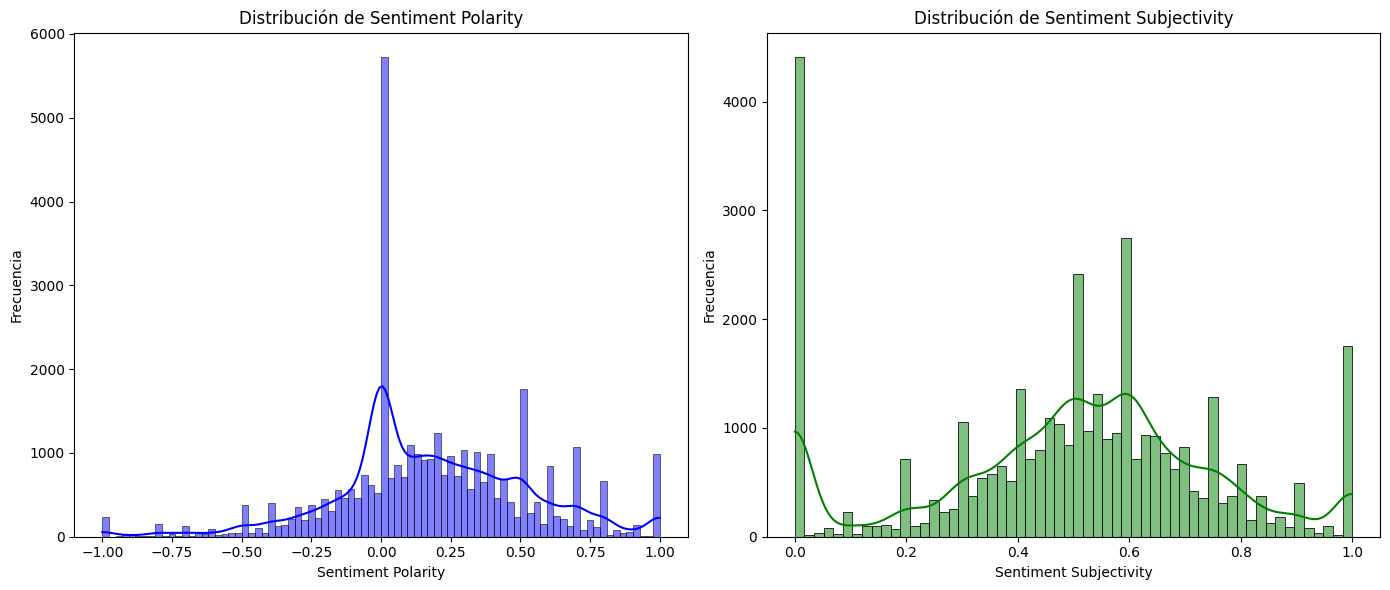

In [13]:
# Distribución de Sentiment_Polarity
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(FinalProject_cleaned['Sentiment_Polarity'], kde=True, color='blue')
plt.title('Distribución de Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frecuencia')

# Distribución de Sentiment_Subjectivity
plt.subplot(1, 2, 2)
sns.histplot(FinalProject_cleaned['Sentiment_Subjectivity'], kde=True, color='green')
plt.title('Distribución de Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gracias a éstas graficas comparativas vemos claramente la diferencia entre Sentiment_Polarity y Sentiment_Subjectivity #

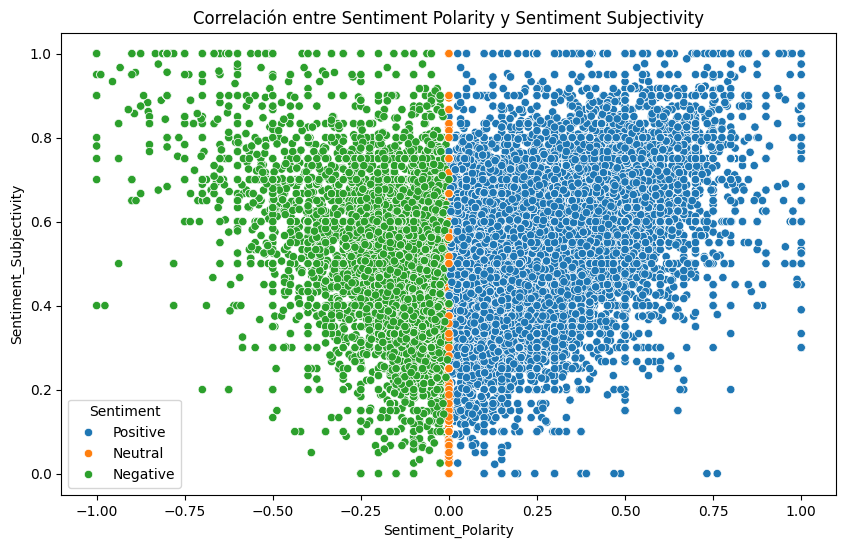

In [14]:
# Correlación entre Sentiment_Polarity y Sentiment_Subjectivity
# la forma de la gráfica se me hizo interesante en cuanto a su forma
# y confirma la correlación, la polaridad está en el rango de [-1,1] donde -1 es negativo y 1 es positivo
# y la subjetividad de acuerdo al estudio es el score de los sentimientos, creencias, etc. de los usuarios #
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sentiment_Polarity", y="Sentiment_Subjectivity", hue="Sentiment", data=FinalProject_cleaned)
plt.title('Correlación entre Sentiment Polarity y Sentiment Subjectivity')
plt.show()

In [15]:
FinalProject_cleaned.to_csv('FinalProject_cleaned.csv', index=False)

Entrena el modelo de Machine Learning, procesamiento de lenguaje natural o red neuronal que creas adecuado.

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tokenización y secuenciación
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(FinalProject_cleaned['Translated_Review'])

# Convertimos los textos a secuencias
sequences = tokenizer.texts_to_sequences(FinalProject_cleaned['Translated_Review'])
padded_sequences = pad_sequences(sequences, padding='post')

# Codificar etiquetas de sentimiento
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(FinalProject_cleaned['Sentiment'])

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Verificar las formas de los datos
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29941, 371)
(29941,)
(7486, 371)
(7486,)


In [17]:
# Construcción del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=padded_sequences.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 clases: positivo, negativo, neutral
])

# Compilación del modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 371, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 3)                 75        
                                                                 
Total params: 160483 (626.89 KB)
Trainable params: 160483 (626.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=2)


Epoch 1/30
936/936 - 5s - loss: 0.8985 - accuracy: 0.6417 - val_loss: 0.8848 - val_accuracy: 0.6391 - 5s/epoch - 6ms/step
Epoch 2/30
936/936 - 4s - loss: 0.8407 - accuracy: 0.6418 - val_loss: 0.7573 - val_accuracy: 0.6407 - 4s/epoch - 4ms/step
Epoch 3/30
936/936 - 3s - loss: 0.6182 - accuracy: 0.7204 - val_loss: 0.5440 - val_accuracy: 0.8083 - 3s/epoch - 4ms/step
Epoch 4/30
936/936 - 3s - loss: 0.4645 - accuracy: 0.8229 - val_loss: 0.4540 - val_accuracy: 0.8370 - 3s/epoch - 3ms/step
Epoch 5/30
936/936 - 3s - loss: 0.3827 - accuracy: 0.8675 - val_loss: 0.3939 - val_accuracy: 0.8676 - 3s/epoch - 4ms/step
Epoch 6/30
936/936 - 3s - loss: 0.3256 - accuracy: 0.8939 - val_loss: 0.3733 - val_accuracy: 0.8743 - 3s/epoch - 4ms/step
Epoch 7/30
936/936 - 3s - loss: 0.2831 - accuracy: 0.9133 - val_loss: 0.3366 - val_accuracy: 0.8853 - 3s/epoch - 4ms/step
Epoch 8/30
936/936 - 4s - loss: 0.2470 - accuracy: 0.9274 - val_loss: 0.3157 - val_accuracy: 0.8982 - 4s/epoch - 4ms/step
Epoch 9/30
936/936 - 3s 

In [19]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

234/234 - 0s - loss: 0.3344 - accuracy: 0.9291 - 353ms/epoch - 2ms/step
Loss: 0.33435505628585815
Accuracy: 0.9290676116943359


In [20]:
# Precisión y matriz de confusión
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import the necessary functions

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)

print(f'Precisión del modelo: {accuracy}')
print('Matriz de confusión:')
print(conf_matrix)
print('Reporte de clasificación:')
print(class_report)

234/234 [==============================] - 0s 2ms/step
Precisión del modelo: 0.929067592839968
Matriz de confusión:
[[1414   57  182]
 [  52  916   81]
 [ 132   27 4625]]
Reporte de clasificación:
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1653
     Neutral       0.92      0.87      0.89      1049
    Positive       0.95      0.97      0.96      4784

    accuracy                           0.93      7486
   macro avg       0.92      0.90      0.91      7486
weighted avg       0.93      0.93      0.93      7486



Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

In [21]:
# Precisión y matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)

print(f'Precisión del modelo: {accuracy}')
print('Matriz de confusión:')
print(conf_matrix)
print('Reporte de clasificación:')
print(class_report)

234/234 [==============================] - 0s 2ms/step
Precisión del modelo: 0.929067592839968
Matriz de confusión:
[[1414   57  182]
 [  52  916   81]
 [ 132   27 4625]]
Reporte de clasificación:
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1653
     Neutral       0.92      0.87      0.89      1049
    Positive       0.95      0.97      0.96      4784

    accuracy                           0.93      7486
   macro avg       0.92      0.90      0.91      7486
weighted avg       0.93      0.93      0.93      7486



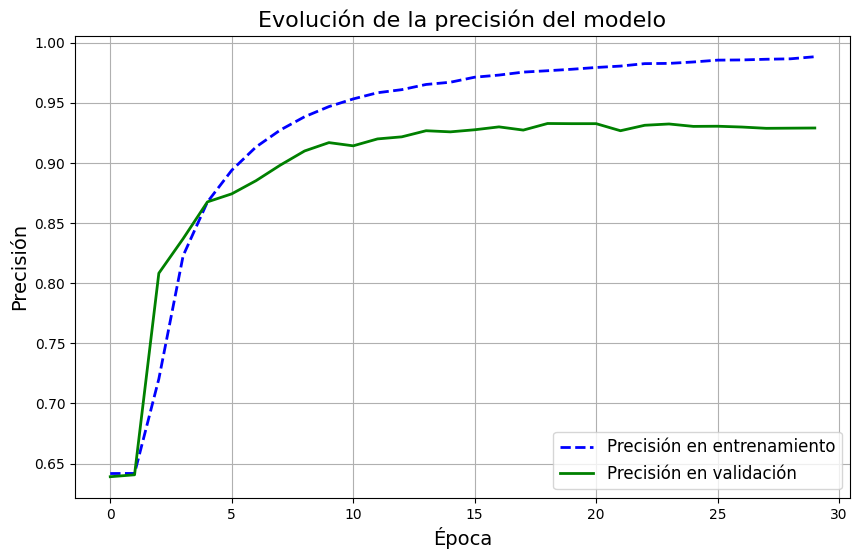

In [22]:
# Gráfica de precisión
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento', color='blue', linestyle='dashed', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Precisión en validación', color='green', linestyle='solid', linewidth=2)
plt.xlabel('Época', fontsize=14)
plt.ylabel('Precisión', fontsize=14)
plt.title('Evolución de la precisión del modelo', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

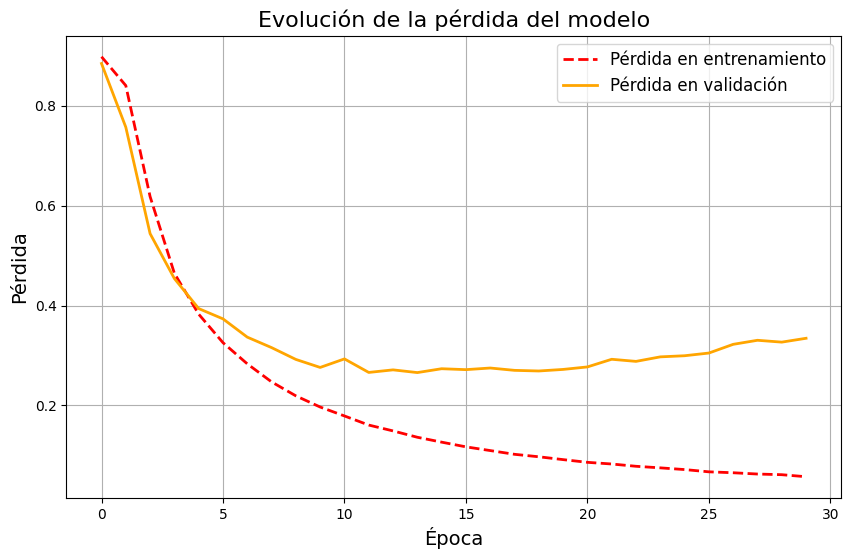

In [23]:
# Gráfica de pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida en entrenamiento', color='red', linestyle='dashed', linewidth=2)
plt.plot(history.history['val_loss'], label='Pérdida en validación', color='orange', linestyle='solid', linewidth=2)
plt.xlabel('Época', fontsize=14)
plt.ylabel('Pérdida', fontsize=14)
plt.title('Evolución de la pérdida del modelo', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()

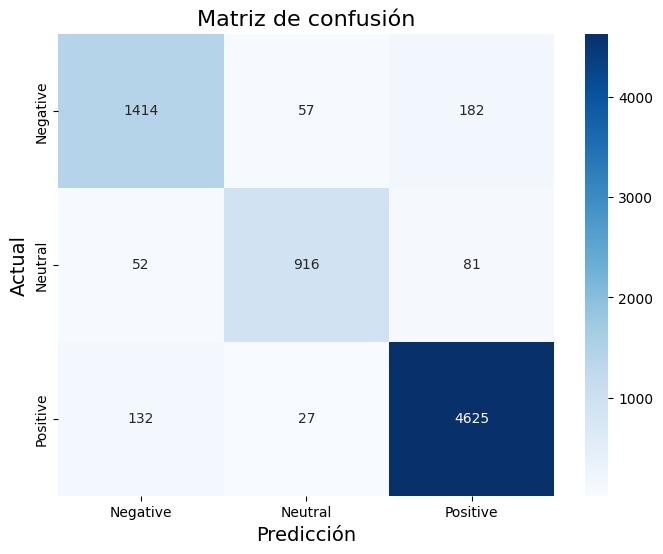

In [24]:
# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Matriz de confusión', fontsize=16)
plt.show()

Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (ensemblings) y de ajuste de hiperparámetros o tuning para intentar mejorar la precisión y disminuir la varianza de tu modelo.

In [25]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.linear_model import LogisticRegression # Import LogisticRegression


# Paso 2: Preprocesamiento del texto (ya implementado anteriormente)


# Paso 2: Transformación de texto a características usando TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(FinalProject_cleaned['Translated_Review']).toarray()
y = FinalProject_cleaned['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0 if x == 'Negative' else 2)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenamiento del modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Paso 4: Evaluación del modelo
y_pred = model.predict(X_test)


# Definir el modelo de RandomForestClassifier
rf_model = RandomForestClassifier()

In [26]:
# Definir la grid de hiperparámetros para ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Implementar GridSearchCV para ajuste de hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [27]:
# Mejor estimador encontrado por GridSearchCV
best_rf_model = grid_search.best_estimator_

print("Mejores hiperparámetros para RandomForestClassifier:")
print(grid_search.best_params_)

Mejores hiperparámetros para RandomForestClassifier:
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'n_estimators': 200}


In [36]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Utilizar el modelo Logistic Regression previo y el mejor modelo RandomForest en un ensamblador de votos
log_model = LogisticRegression(max_iter=1000)
voting_ensamble = VotingClassifier(estimators=[('lr', log_model), ('rf', best_rf_model)], voting='soft')

# Entrenar el ensamble con los datos de entrenamiento
voting_ensamble.fit(X_train, y_train)

# Evaluar el modelo de ensamblaje en el conjunto de prueba
y_pred_ensamble = voting_ensamble.predict(X_test)

In [37]:
# Métricas y gráficas para el modelo de ensamblaje

# Métricas de rendimiento adicionales
print("Informe de clasificación para el ensamble:")
print(classification_report(y_test, y_pred_ensamble, target_names=['Negative', 'Positive', 'Neutral']))

print("Exactitud del modelo de ensamblaje:")
accuracy_ensamble = accuracy_score(y_test, y_pred_ensamble)
print(accuracy_ensamble)


Informe de clasificación para el ensamble:
              precision    recall  f1-score   support

    Negative       0.96      0.69      0.80      1653
    Positive       0.84      0.99      0.91      4784
     Neutral       0.95      0.60      0.73      1049

    accuracy                           0.87      7486
   macro avg       0.92      0.76      0.81      7486
weighted avg       0.88      0.87      0.86      7486

Exactitud del modelo de ensamblaje:
0.8677531391931605


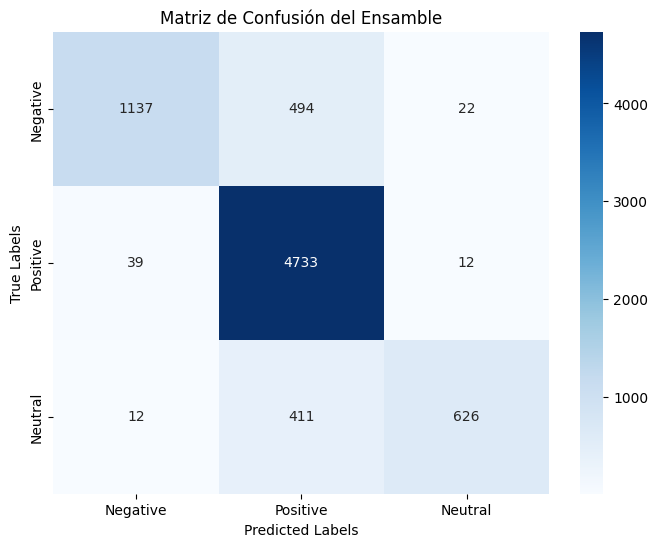

In [38]:
# Gráfico 1: Matriz de Confusión para el ensamble
cm_ensamble = confusion_matrix(y_test, y_pred_ensamble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensamble, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title('Matriz de Confusión del Ensamble')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [39]:
# Import necessary modules
from sklearn.metrics import roc_curve, auc

# Gráfico 2: Curva ROC para el ensamble
fpr_ensamble = {}
tpr_ensamble = {}
roc_auc_ensamble = {}

for i in range(3):
    fpr_ensamble[i], tpr_ensamble[i], _ = roc_curve(y_test, voting_ensamble.predict_proba(X_test)[:, i], pos_label=i)
    roc_auc_ensamble[i] = auc(fpr_ensamble[i], tpr_ensamble[i])

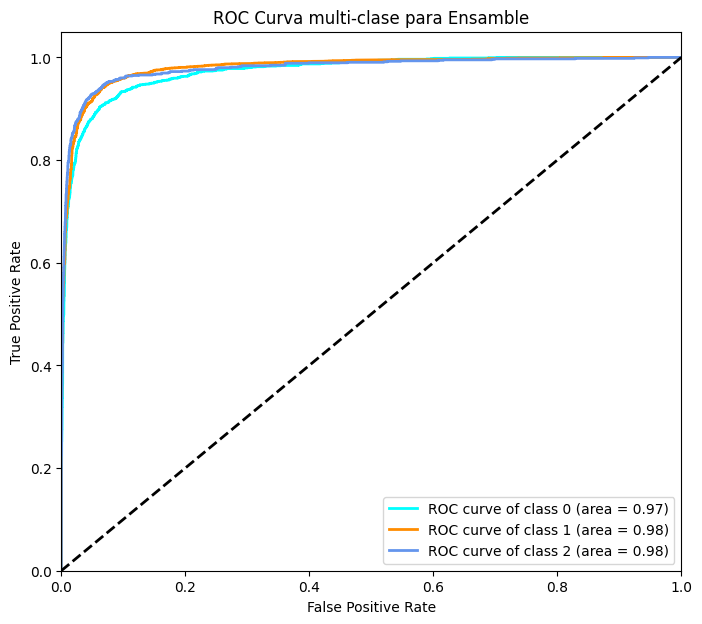

In [135]:
# Plotting ROC curve for each class
plt.figure(figsize=(8, 7))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(3), colors):
    plt.plot(fpr_ensamble[i], tpr_ensamble[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
                                                     ''.format(i, roc_auc_ensamble[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curva multi-clase para Ensamble')
plt.legend(loc="lower right")
plt.show()

In [70]:
# API REST #

In [71]:
!pip install Flask

In [72]:
# Guardar el modelo entrenado y el vectorizador TF-IDF
import pickle

with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf, tfidf_file)

print("El modelo y el vectorizador TF-IDF han sido guardados.")

El modelo y el vectorizador TF-IDF han sido guardados.


In [73]:
!pip install joblib

In [74]:
import joblib

In [75]:
# Guardar el modelo entrenado
joblib.dump(model, 'logistic_regression_model.joblib')

# También puedes guardar el vectorizador TF-IDF de manera similar
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [76]:
# Cargar el modelo entrenado
model = joblib.load('logistic_regression_model.joblib')

# Cargar el vectorizador TF-IDF
tfidf = joblib.load('tfidf_vectorizer.joblib')

In [77]:
# Ejemplo de uso para hacer predicciones
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    return text

In [133]:
# Suponiendo que deseas predecir una nueva revisión
new_review = "i dont know"
cleaned_review = clean_text(new_review)
review_vector = tfidf.transform([cleaned_review])
prediction = model.predict(review_vector)


In [134]:
# Convertir resultado numérico a categoría
sentiment = 'Positive' if prediction[0] == 1 else 'Negative' if prediction[0] == 0 else 'Neutral'
print(sentiment)

Neutral


In [136]:
!git clone https://github.com/MmoreloOs/sentiment-analysis-app.git
%cd sentiment-analysis-app

Cloning into 'sentiment-analysis-app'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), done.
Resolving deltas: 100% (2/2), done.
/content/drive/MyDrive/UCAMP 7 Final/sentiment-analysis-app/sentiment-analysis-app


In [106]:
pip freeze > requirements.txt

In [121]:

!pip install Flask